In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('/content/social_ads.csv')

In [3]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


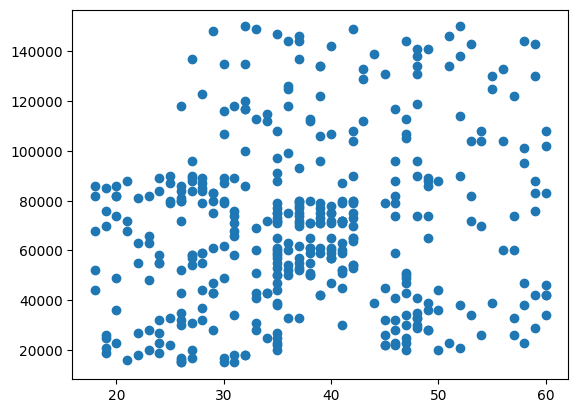

In [4]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:2], df.iloc[:,-1],test_size=0.2)

In [7]:
X_train

,Age,EstimatedSalary
129,26,84000
256,41,72000
315,39,75000
248,41,52000
341,35,75000
...,...,...
134,28,55000
328,36,118000
289,37,78000
279,50,36000


In [8]:
y_train

,Purchased
129,0
256,0
315,1
248,0
341,0
...,...
134,0
328,1
289,1
279,1


### Without feature scaling

In [9]:
model = Sequential()

model.add(Dense(100, activation='relu', input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6511 - loss: 1068.6741 - val_accuracy: 0.3375 - val_loss: 596.2972
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4007 - loss: 377.6328 - val_accuracy: 0.6625 - val_loss: 116.6613
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5237 - loss: 80.7439 - val_accuracy: 0.6625 - val_loss: 36.6164
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5061 - loss: 51.7684 - val_accuracy: 0.6625 - val_loss: 25.0611
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4886 - loss: 51.0895 - val_accuracy: 0.6625 - val_loss: 26.3166
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4810 - loss: 58.6052 - val_accuracy: 0.6625 - val_loss: 17.8259
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4686 - loss: 76.2388 - val_accuracy: 0.6625 - val_loss: 118.8744
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5968 - loss: 97.5941 - val_accurac

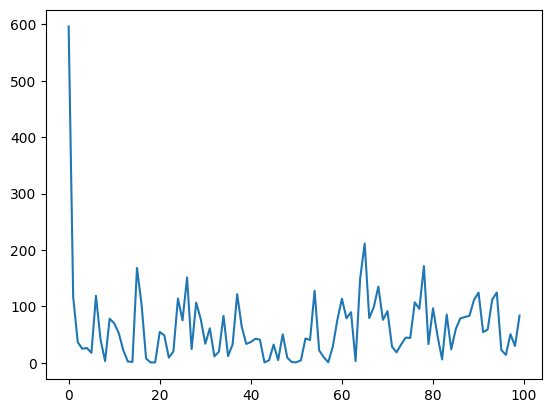

In [17]:
plt.plot(history.history['val_loss'])

# With Scaling

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-1.08143503,  0.41514264],
       [ 0.32150771,  0.06896506],
       [ 0.13444868,  0.15550946],
       [ 0.32150771, -0.50799756],
       [-0.23966938,  0.15550946],
       [ 0.32150771,  0.29975011],
       [-1.45555309, -1.22920084],
       [-0.894376  , -0.30606064],
       [ 0.13444868,  0.76132021],
       [ 0.88268481,  1.02095339],
       [-0.3331989 ,  1.22289031],
       [ 0.41503723,  1.10749779],
       [-0.61378745,  1.3959791 ],
       [-1.08143503,  0.4728389 ],
       [-0.52025793, -1.48883402],
       [ 0.41503723, -0.4503013 ],
       [ 1.16327335,  0.53053516],
       [ 0.78915529,  0.76132021],
       [ 0.04091916,  1.25173844],
       [-0.05261035,  2.20372677],
       [-0.05261035, -1.05611205],
       [ 1.06974384, -1.20035271],
       [-0.98790551, -1.11380831],
       [ 1.35033239,  1.28058657],
       [-1.26849406, -1.34459336],
       [ 0.13444868,  0.27090198],
       [ 0.69562577,  1.7710048 ],
       [-0.98790551,  0.76132021],
       [-0.80084648,

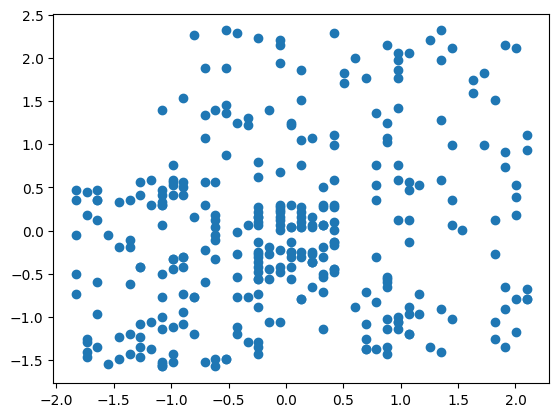

In [20]:
# As we can see spread is same only scale is different
plt.scatter(X_train_scaled[:,0],X_train_scaled[:,1])

In [21]:
model = Sequential()

model.add(Dense(100,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),batch_size=50, epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3681 - loss: 0.7034 - val_accuracy: 0.5875 - val_loss: 0.6721
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6885 - loss: 0.6591 - val_accuracy: 0.8250 - val_loss: 0.6419
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8570 - loss: 0.6230 - val_accuracy: 0.8125 - val_loss: 0.6148
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8384 - loss: 0.5941 - val_accuracy: 0.7875 - val_loss: 0.5897
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8538 - loss: 0.5608 - val_accuracy: 0.8250 - val_loss: 0.5667
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8371 - loss: 0.5346 - val_accuracy: 0.8250 - val_loss: 0.5455
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8472 - loss: 0.5101 - val_accuracy: 0.8250 - val_loss: 0.5258
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8138 - loss: 0.5038 - val_accuracy: 0.8250 - val_loss:

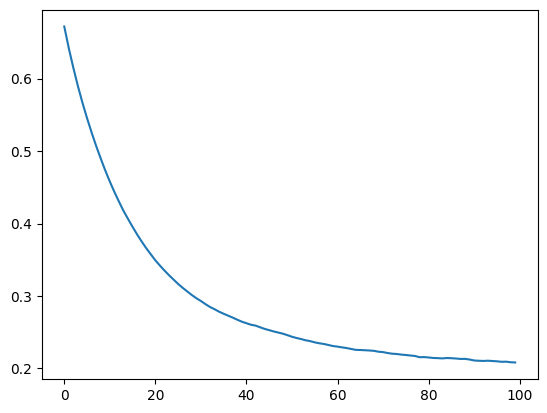

In [24]:
plt.plot(history.history['val_loss'])

### As we can see that scaling data decrease the data smoothly and not scaling data gives unstable decrease in loss.

### The reason is that:
* Geometrically: It creates a nonconvex shape which is hard traverse.
* Mathematically: It gives importance to that column which is big value and less importance to smaller values column.